In [1]:
import cv2
import os
import tensorflow as tf
from PIL import Image
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.vgg16 import preprocess_input as prevgg16
from keras.applications.vgg19 import preprocess_input as prevgg19
from keras.applications.resnet_v2 import preprocess_input as preres
from keras.applications.mobilenet_v2 import preprocess_input as premob
from keras.applications.efficientnet_v2 import preprocess_input as preeffV2
from keras.applications.efficientnet import preprocess_input as preeff
from keras.applications.inception_v3 import preprocess_input as preinc
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Testing Old Models 

In [3]:
#Loading Training Dataset
IMAGE_HEIGHT_WIDTH = 350
train = ImageDataGenerator(rescale = 1./255)
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDataset/trainSet',
                                          target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                          batch_size = 32,
                                          class_mode = "categorical")

Found 140 images belonging to 7 classes.


In [4]:
#making a dictionary with each word in our dataset as a key
my_dic = dict(train_dataset.class_indices)

#making a list of the dataset words
dic = list(train_dataset.class_indices)
my_dic

{'bed': 0,
 'father': 1,
 'full': 2,
 'police': 3,
 'shirt': 4,
 'water': 5,
 'wrong': 6}

In [5]:
#loading the testset
dir_path = "/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDataset/newTest"
y_test_old = []

#getting ytest to compare it with our predicted output
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '/' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    name = i
    name = name.split("_")[0]
    
    y_test_old.append(my_dic.get(name))

print(y_test_old)

[3, 3, 3, 2, 2, 4, 4, 6, 6, 5, 5, 5, 6, 4, 5, 2, 3, 4, 4, 3, 2, 2, 6, 5, 6, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [6]:
#loading Vgg16 Model
model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_1/vgg16_1.h5")
out_predicitons10 = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = prevgg16(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons10.append(prediction)

print(confusion_matrix(y_test_old, out_predicitons10))
print(classification_report(y_test_old, out_predicitons10))

1/1 [==============================] - 0s 27ms/step
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 1 0]
 [0 0 0 0 5 0 0]
 [0 0 0 3 2 0 0]
 [0 0 0 0 5 0 0]
 [2 0 0 1 0 2 0]
 [0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5
           3       0.75      0.60      0.67         5
           4       0.42      1.00      0.59         5
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00         5

    accuracy                           0.69        35
   macro avg       0.65      0.69      0.64        35
weighted avg       0.65      0.69      0.64        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#loading ResNet50V2 Model
model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_1/res50V2_cropped.h5")
out_predicitons11 = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))

    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preres(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons11.append(prediction)

print(confusion_matrix(y_test_old, out_predicitons11))
print(classification_report(y_test_old, out_predicitons11))

1/1 [==============================] - 0s 21ms/step
[[5 0 0 0 0 0 0]
 [0 2 0 0 0 3 0]
 [0 0 1 0 4 0 0]
 [0 0 0 2 3 0 0]
 [0 0 0 0 4 0 1]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       1.00      0.20      0.33         5
           3       1.00      0.40      0.57         5
           4       0.36      0.80      0.50         5
           5       0.62      1.00      0.77         5
           6       0.83      1.00      0.91         5

    accuracy                           0.69        35
   macro avg       0.83      0.69      0.66        35
weighted avg       0.83      0.69      0.66        35



In [8]:
#loading MobileV2 model
model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_1/mobileV2_cropped.h5")
out_predicitons12 = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = premob(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons12.append(prediction)

print(confusion_matrix(y_test_old, out_predicitons12))
print(classification_report(y_test_old, out_predicitons12))

1/1 [==============================] - 0s 19ms/step
[[5 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 5 0 0 0 0]
 [0 0 1 4 0 0 0]
 [0 0 4 0 0 0 1]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       0.50      1.00      0.67         5
           3       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5

    accuracy                           0.83        35
   macro avg       0.76      0.83      0.78        35
weighted avg       0.76      0.83      0.78        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
#loading InceptionV3 model
model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_1/inceptionV3_cropped.h5")
out_predicitons13 = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preinc(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons13.append(prediction)


print(confusion_matrix(y_test_old, out_predicitons13))
print(classification_report(y_test_old, out_predicitons13))

1/1 [==============================] - 0s 23ms/step
[[5 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 1 0 4 0 0]
 [1 0 0 3 1 0 0]
 [0 0 0 0 5 0 0]
 [2 3 0 0 0 0 0]
 [0 0 0 0 4 0 1]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.62      1.00      0.77         5
           2       1.00      0.20      0.33         5
           3       1.00      0.60      0.75         5
           4       0.36      1.00      0.53         5
           5       0.00      0.00      0.00         5
           6       1.00      0.20      0.33         5

    accuracy                           0.57        35
   macro avg       0.66      0.57      0.50        35
weighted avg       0.66      0.57      0.50        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


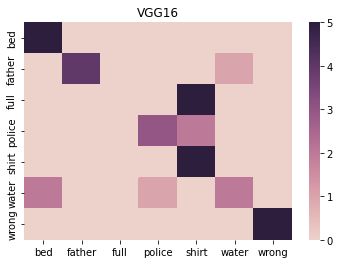

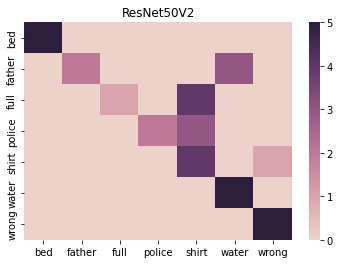

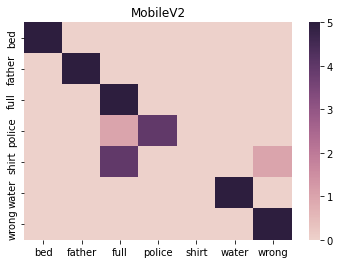

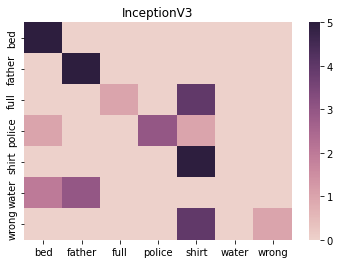

In [10]:
#making a list with the predicted outputs
outputss = [out_predicitons10,out_predicitons11,out_predicitons12,out_predicitons13]
my_titles = ["VGG16","ResNet50V2","MobileV2","InceptionV3"]

#ploting heatmap 
for i in range(len(outputss)):
  df = pd.DataFrame(confusion_matrix(y_test_old, outputss[i]))
  df = df.rename(columns=lambda x: str(dic[x]))
  df = df.rename(index=lambda x: str(dic[x]))
  plt.figure()
  plt.title(my_titles[i])
  sns.heatmap(df,cmap=sns.cubehelix_palette(as_cmap=True))
  plt.show()

Text(0, 0.5, 'F1 Score')

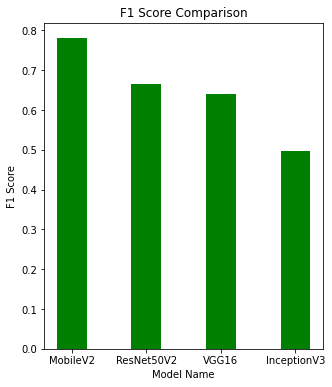

In [17]:
#plotting the f1-score comparison
x = []
y = ["MobileV2","ResNet50V2","VGG16","InceptionV3"]


for i in range(len(outputss)):
  x.append(f1_score(y_test_old, outputss[i], average='macro'))

x.sort(reverse=True)
plt.figure(figsize=(5,6)) 
plt.title("F1 Score Comparison")
plt.bar(y,x,0.4,color = "green")
plt.xlabel("Model Name")
plt.ylabel("F1 Score")

Text(0, 0.5, 'Percentage')

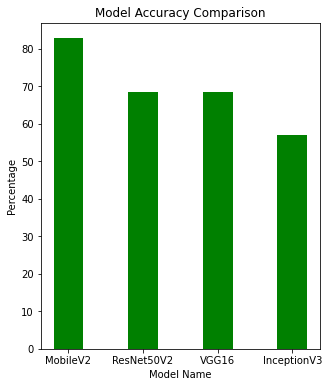

In [18]:
#plotting accuracy score comparison
x = []
y = ["MobileV2","ResNet50V2","VGG16","InceptionV3"]

for i in range(len(outputss)):
  x.append(accuracy_score(y_test_old, outputss[i])*100)

x.sort(reverse=True)
plt.figure(figsize=(5,6)) 
plt.title("Model Accuracy Comparison")
plt.bar(y,x,0.4,color = "green")
plt.xlabel("Model Name")
plt.ylabel("Percentage")

# Testing Final Models
 

In [19]:
#Loading Training Dataset
IMAGE_HEIGHT_WIDTH = 350
train = ImageDataGenerator(rescale = 1./255)
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDatasetV2/trainSet',
                                          target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                          batch_size = 32,
                                          class_mode = "categorical")

Found 900 images belonging to 15 classes.


In [20]:
#making a dictionary with each word in our dataset as a key
my_dic = dict(train_dataset.class_indices)

#making a list of the dataset words
dic = list(train_dataset.class_indices)
my_dic

{'drink': 0,
 'food': 1,
 'full': 2,
 'have': 3,
 'hello': 4,
 'i': 5,
 'i love you': 6,
 'police': 7,
 'prefer': 8,
 'shirt': 9,
 'telephone': 10,
 'water': 11,
 'wrong': 12,
 'yes': 13,
 'you': 14}

In [21]:
#loading the testset
dir_path = "/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDatasetV2/new_testSet"
y_test = []

#getting ytest to compare it with our predicted output
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    name = i
    name = name.split("_")[0]
    
    y_test.append(my_dic.get(name))

print(y_test)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14]


In [22]:
#loading VGG16 model
model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_2/VGG16_Augmented1.h5")
out_predicitons0 = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = prevgg16(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons0.append(prediction)

print(confusion_matrix(y_test, out_predicitons0))
print(classification_report(y_test, out_predicitons0))

1/1 [==============================] - 0s 16ms/step
[[5 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 4]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       

In [23]:
#loading VGG19 Model
out_predicitons1 = []
model1 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_2/VGG19_Augmented1.h5")

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = prevgg19(my_image)

    #make the prediction
    prediction = model1.predict(my_image).argmax()
    out_predicitons1.append(prediction)

print(confusion_matrix(y_test, out_predicitons1))
print(classification_report(y_test, out_predicitons1)) 

1/1 [==============================] - 0s 23ms/step
[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 4 0 0 0 0 0 0 1 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 4 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 4 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.17      0.29         6
           2       1.00      1.00      1.00         6
           3       1.00      0.67      0.80         6
           4       0.60      1.00      0.75         6
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00         6
           7       

In [24]:
#loading MobileV2 model 
model2 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/mobileV2_Aug.h5")
out_predicitons2 = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))

    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = premob(my_image)

    #make the prediction
    prediction = model2.predict(my_image).argmax()
    out_predicitons2.append(prediction)


print(confusion_matrix(y_test, out_predicitons2))
print(classification_report(y_test, out_predicitons2))

1/1 [==============================] - 0s 21ms/step
[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 1]
 [0 0 0 0 3 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         6
           3       0.80      0.67      0.73         6
           4       0.60      1.00      0.75         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       

In [25]:
model3 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/res50V2_Aug.h5")
out_predicitons3 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    
    #preprocess the image    
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preres(my_image)

    #make the prediction
    prediction = model3.predict(my_image).argmax()
    out_predicitons3.append(prediction)

print(confusion_matrix(y_test, out_predicitons3))
print(classification_report(y_test, out_predicitons3))

1/1 [==============================] - 0s 25ms/step
[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 4]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      0.83      0.91         6
           4       0.71      0.83      0.77         6
           5       1.00      0.83      0.91         6
           6       1.00      1.00      1.00         6
           7       

In [26]:
#loading Resnet101V2 model
model4 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/res101V2_Aug.h5")
out_predicitons4 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    
    #preprocess the image    
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preres(my_image)

    #make the prediction
    prediction = model4.predict(my_image).argmax()
    out_predicitons4.append(prediction)

print(confusion_matrix(y_test, out_predicitons4))
print(classification_report(y_test, out_predicitons4))

1/1 [==============================] - 0s 29ms/step
[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 3 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 1 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 4 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.33      0.50         6
           2       1.00      1.00      1.00         6
           3       0.86      1.00      0.92         6
           4       0.50      1.00      0.67         6
           5       1.00      0.50      0.67         6
           6       1.00      0.83      0.91         6
           7       

In [27]:
#loading EffceientNetB7 model
model5 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/effcientb7_Aug.h5")
out_predicitons5 = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preeff(my_image)

    #make the prediction
    prediction = model5.predict(my_image).argmax()
    out_predicitons5.append(prediction)

print(confusion_matrix(y_test, out_predicitons5))
print(classification_report(y_test, out_predicitons5))

1/1 [==============================] - 0s 51ms/step
[[0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 2 0 0 0]
 [0 0 2 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 1 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 1 1 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 2 0 3 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 0 0 0 2 0 1 0]
 [0 0 0 0 0 0 3 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 1 2 0]
 [0 0 0 0 0 0 1 1 0 0 0 2 0 2 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       1.00      0.33      0.50         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.09      0.17      0.12         6
           7       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#loading effcientV2l Model
model6 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/effcientV2L_Aug.h5")
out_predicitons6 = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))

    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preeffV2(my_image)

    #make the prediction
    prediction = model6.predict(my_image).argmax()
    out_predicitons6.append(prediction)


print(confusion_matrix(y_test, out_predicitons6))
print(classification_report(y_test, out_predicitons6))

1/1 [==============================] - 0s 59ms/step
[[0 0 0 0 0 0 0 0 0 1 1 3 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 4 1 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 1 0 2 0 1 0]
 [0 0 0 0 0 0 0 0 1 1 0 3 1 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 2 1 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 4 0 0 0]
 [0 0 0 0 0 1 0 2 0 1 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 0 0]
 [0 0 2 0 0 1 0 0 0 2 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 1 2 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 1 0 0 0]
 [0 1 0 0 0 0 0 3 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 4 1 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#loading effcientV2M Model
model7 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/effcientV2M_Aug.h5")
out_predicitons7 = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preeffV2(my_image)

    #make the prediction
    prediction = model7.predict(my_image).argmax()
    out_predicitons7.append(prediction)
    # print(dic[prediction])

print(confusion_matrix(y_test, out_predicitons7))
print(classification_report(y_test, out_predicitons7))

1/1 [==============================] - 0s 46ms/step
[[0 0 2 1 0 0 0 0 0 1 0 0 1 0 1]
 [0 3 0 0 1 0 0 0 0 1 0 1 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 2 1 0]
 [0 0 1 0 1 1 0 0 0 2 0 0 0 1 0]
 [0 1 2 0 0 0 0 0 0 1 1 0 1 0 0]
 [2 0 0 0 0 0 0 0 0 0 1 0 0 2 1]
 [0 0 3 0 2 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 0 0 2 1 0 0 0 1]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 4 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 0 3 0 0 0]
 [0 0 5 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 1 0 0 0 0 1 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 2 0 1 1 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.50      0.50         6
           2       0.18      1.00      0.30         6
           3       0.00      0.00      0.00         6
           4       0.10      0.17      0.12         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


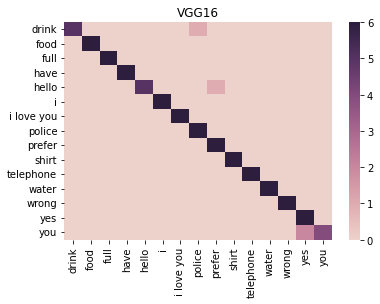

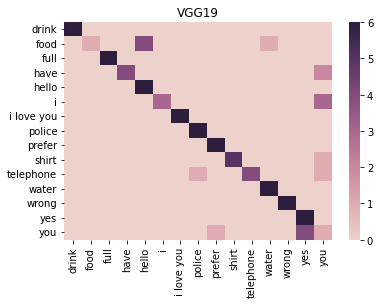

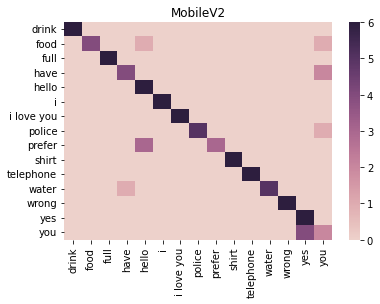

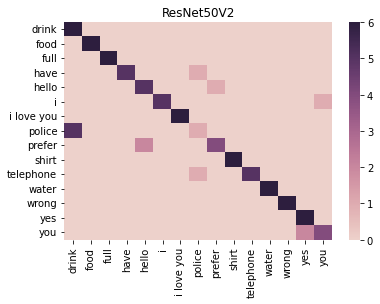

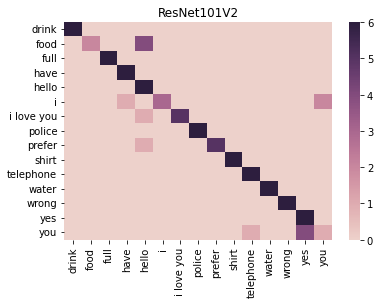

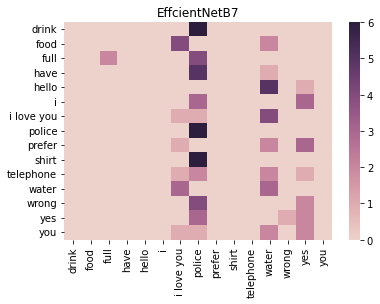

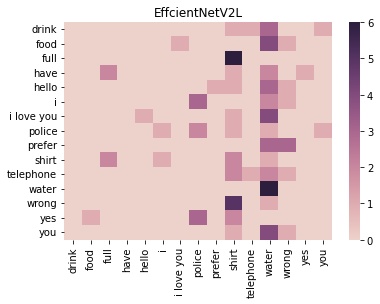

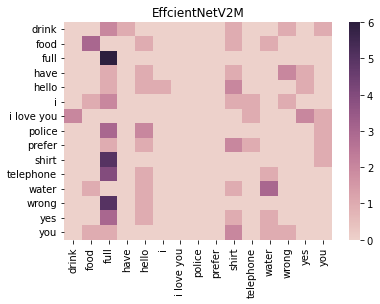

In [30]:
#making a list with the predicted outputs
outputss = [out_predicitons0,out_predicitons1,out_predicitons2,out_predicitons3,out_predicitons4,out_predicitons5,\
            out_predicitons6,out_predicitons7]
my_titles = ["VGG16","VGG19","MobileV2","ResNet50V2","ResNet101V2","EffcientNetB7","EffcientNetV2L","EffcientNetV2M"]

#ploting heatmap 
for i in range(len(outputss)):
  df = pd.DataFrame(confusion_matrix(y_test, outputss[i]))
  df = df.rename(columns=lambda x: str(dic[x]))
  df = df.rename(index=lambda x: str(dic[x]))
  plt.figure()
  plt.title(my_titles[i])
  sns.heatmap(df,cmap=sns.cubehelix_palette(as_cmap=True))
  plt.show()


Text(0, 0.5, 'F1 Score')

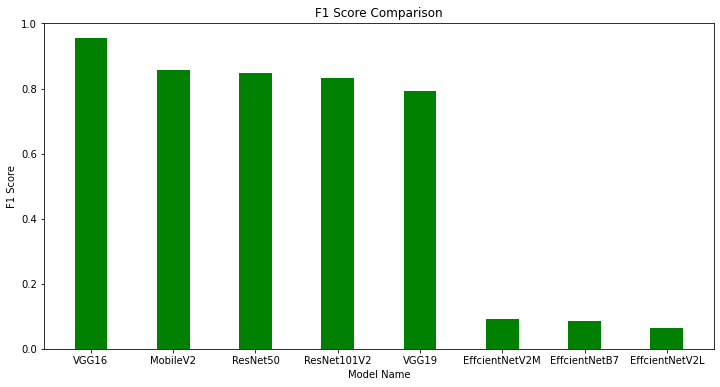

In [40]:
#plotting the f1-score comparison
x = []
y = ["VGG16","MobileV2","ResNet50","ResNet101V2","VGG19","EffcientNetV2M","EffcientNetB7","EffcientNetV2L"]

for i in range(len(outputss)):
  # print(str(my_titles[i])+" Model Accuracy =\t"+str(f1_score(y_test, outputss[i], average='macro')))
  x.append(f1_score(y_test, outputss[i], average='macro'))

x.sort(reverse=True)
plt.figure(figsize=(12,6)) 
plt.title("F1 Score Comparison")
plt.bar(y,x,0.4,color = "green")
plt.xlabel("Model Name")
plt.ylabel("F1 Score")

Text(0, 0.5, 'Percentage')

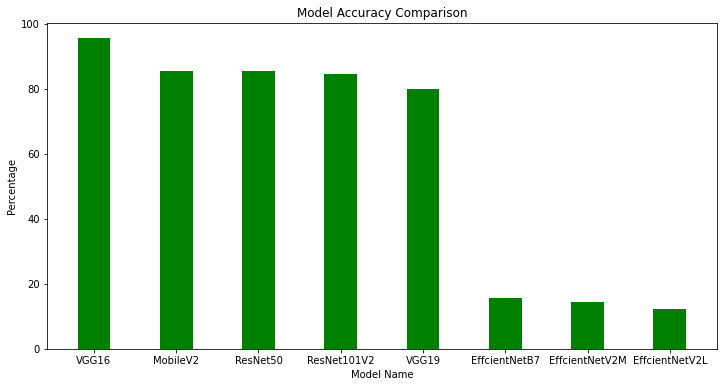

In [44]:
#plotting accuracy score comparison
x = []
y = ["VGG16","MobileV2","ResNet50","ResNet101V2","VGG19","EffcientNetB7","EffcientNetV2M","EffcientNetV2L"]

for i in range(len(outputss)):
  # print(str(my_titles[i])+" Model Accuracy =\t"+str(accuracy_score(y_test, outputss[i])))
  x.append(accuracy_score(y_test, outputss[i])*100)

x.sort(reverse=True)
plt.figure(figsize=(12,6)) 
plt.title("Model Accuracy Comparison")
plt.bar(y,x,0.4,color = "green")
plt.xlabel("Model Name")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

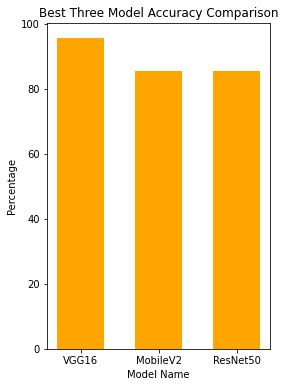

In [56]:
#plotting the best 3 models accuracy score comparison
x = []
y = ["VGG16","MobileV2","ResNet50"]

for i in range(len(outputss)):
  if i == 0 or i == 2 or i == 3:
    x.append(accuracy_score(y_test, outputss[i])*100)
  else:
    continue

plt.figure(figsize=(4,6)) 
plt.title("Best Three Model Accuracy Comparison")
plt.bar(y,x,0.6,color = "orange")
plt.xlabel("Model Name")
plt.ylabel("Percentage")